<a href="https://colab.research.google.com/github/i-r-a/toxic/blob/master/Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import os
import io
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
train = pd.read_csv('drive/My Drive/clean_data.csv')

In [4]:
train.drop([53787,64904,76037,106891,141293,163251,
168946,
178686,
193979,
200638,
202961,
204721,
210601,
213685,
217810],inplace=True)

In [5]:
le = preprocessing.LabelEncoder()
cz = le.fit_transform(train.comment_text)

In [6]:
y_columns = "toxic"

In [7]:
y = train[y_columns]
x = cz
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

In [8]:
x_train,y_train

(array([  2434, 203820,  90921, ..., 160558, 126719,   4174]), 50459     0
 102570    0
 6659      0
 90824     0
 212885    0
          ..
 7146      0
 169681    0
 60310     0
 203244    1
 50385     0
 Name: toxic, Length: 178827, dtype: int64)

In [9]:
x_train = x_train.reshape(-1,1)

In [10]:
LIN = LinearRegression()
LIN.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
x_test = x_test.reshape(-1,1)
y_pred = LIN.predict(x_train)
y_pred2 = LIN.predict(x_test)


In [12]:
print("Train MAE: ")
print(metrics.mean_absolute_error(y_train,y_pred))
print()
print("Test MAE: ")
print(metrics.mean_absolute_error(y_test,y_pred2))
print()
print("Test MSE: ")
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

Train MAE: 
0.17088284958018007

Test MAE: 
0.1695663878364376

Test MSE: 
0.2900735877586742


In [19]:
pred = []
for elem in y_pred:
  pred.append(int(round(elem)))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95    161660
           1       0.00      0.00      0.00     17167

    accuracy                           0.90    178827
   macro avg       0.45      0.50      0.47    178827
weighted avg       0.82      0.90      0.86    178827

[[161660      0]
 [ 17167      0]]


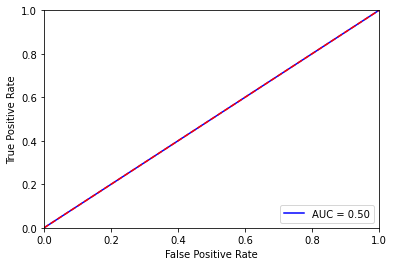

In [20]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [21]:
pred = []
for elem in y_pred2:
  pred.append(int(round(elem)))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     40490
           1       0.00      0.00      0.00      4217

    accuracy                           0.91     44707
   macro avg       0.45      0.50      0.48     44707
weighted avg       0.82      0.91      0.86     44707

[[40490     0]
 [ 4217     0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


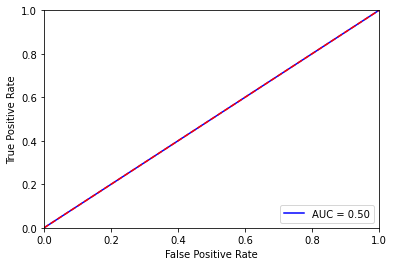

In [22]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [23]:
y_columns = "severe_toxic"
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
x_train = x_train.reshape(-1,1)
LIN = LinearRegression()
LIN.fit(x_train, y_train)
x_test = x_test.reshape(-1,1)
y_pred = LIN.predict(x_train)
y_pred2 = LIN.predict(x_test)
print("Train MAE: ")
print(metrics.mean_absolute_error(y_train,y_pred))
print()
print("Test MAE: ")
print(metrics.mean_absolute_error(y_test,y_pred2))
print()
print("Test MSE: ")
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

Train MAE: 
0.016947969170342116

Test MAE: 
0.017973584579362878

Test MSE: 
0.09747961912780906


In [24]:
pred = []
for elem in y_pred:
  pred.append(int(round(elem)))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    177295
           1       0.00      0.00      0.00      1532

    accuracy                           0.99    178827
   macro avg       0.50      0.50      0.50    178827
weighted avg       0.98      0.99      0.99    178827

[[177295      0]
 [  1532      0]]


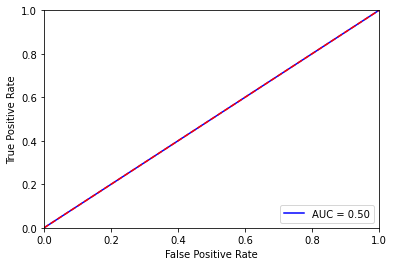

In [25]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
pred = []
for elem in y_pred2:
  pred.append(int(round(elem)))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     44277
           1       0.00      0.00      0.00       430

    accuracy                           0.99     44707
   macro avg       0.50      0.50      0.50     44707
weighted avg       0.98      0.99      0.99     44707

[[44277     0]
 [  430     0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


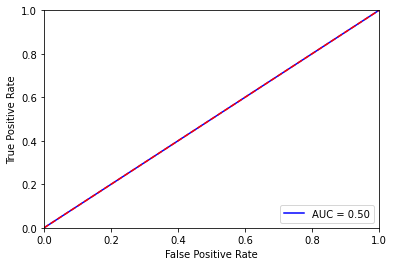

In [27]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
y_columns = "obscene"
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
x_train = x_train.reshape(-1,1)
LIN = LinearRegression()
LIN.fit(x_train, y_train)
x_test = x_test.reshape(-1,1)
y_pred = LIN.predict(x_train)
y_pred2 = LIN.predict(x_test)
print("Train MAE: ")
print(metrics.mean_absolute_error(y_train,y_pred))
print()
print("Test MAE: ")
print(metrics.mean_absolute_error(y_test,y_pred2))
print()
print("Test MSE: ")
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

Train MAE: 
0.10237608841078746

Test MAE: 
0.10091781605579937

Test MSE: 
0.22302764432217032


In [29]:
pred = []
for elem in y_pred:
  pred.append(int(round(elem)))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97    169058
           1       0.00      0.00      0.00      9769

    accuracy                           0.95    178827
   macro avg       0.47      0.50      0.49    178827
weighted avg       0.89      0.95      0.92    178827

[[169058      0]
 [  9769      0]]


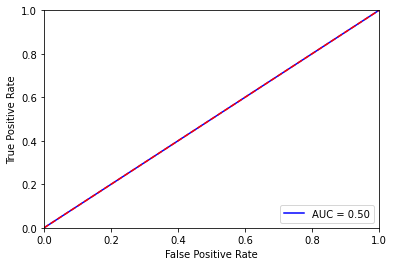

In [30]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [31]:
pred = []
for elem in y_pred2:
  pred.append(int(round(elem)))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     42336
           1       0.00      0.00      0.00      2371

    accuracy                           0.95     44707
   macro avg       0.47      0.50      0.49     44707
weighted avg       0.90      0.95      0.92     44707

[[42336     0]
 [ 2371     0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


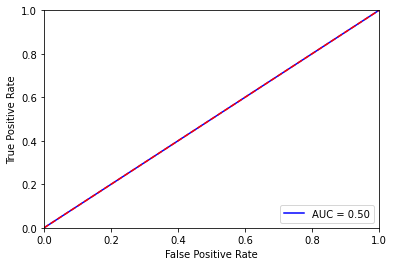

In [32]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
y_columns = "threat"
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
x_train = x_train.reshape(-1,1)
LIN = LinearRegression()
LIN.fit(x_train, y_train)
x_test = x_test.reshape(-1,1)
y_pred = LIN.predict(x_train)
y_pred2 = LIN.predict(x_test)
print("Train MAE: ")
print(metrics.mean_absolute_error(y_train,y_pred))
print()
print("Test MAE: ")
print(metrics.mean_absolute_error(y_test,y_pred2))
print()
print("Test MSE: ")
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

Train MAE: 
0.006118083181715099

Test MAE: 
0.00617771448929243

Test MSE: 
0.05585189090279451


In [34]:
pred = []
for elem in y_pred:
  pred.append(int(round(elem)))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    178278
           1       0.00      0.00      0.00       549

    accuracy                           1.00    178827
   macro avg       0.50      0.50      0.50    178827
weighted avg       0.99      1.00      1.00    178827

[[178278      0]
 [   549      0]]


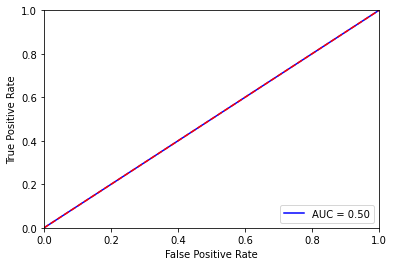

In [35]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:
pred = []
for elem in y_pred2:
  pred.append(int(round(elem)))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44567
           1       0.00      0.00      0.00       140

    accuracy                           1.00     44707
   macro avg       0.50      0.50      0.50     44707
weighted avg       0.99      1.00      1.00     44707

[[44567     0]
 [  140     0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


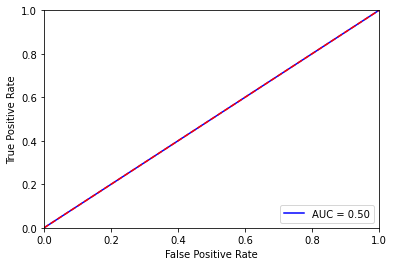

In [37]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
y_columns = "insult"
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
x_train = x_train.reshape(-1,1)
LIN = LinearRegression()
LIN.fit(x_train, y_train)
x_test = x_test.reshape(-1,1)
y_pred = LIN.predict(x_train)
y_pred2 = LIN.predict(x_test)
print("Train MAE: ")
print(metrics.mean_absolute_error(y_train,y_pred))
print()
print("Test MAE: ")
print(metrics.mean_absolute_error(y_test,y_pred2))
print()
print("Test MSE: ")
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

Train MAE: 
0.0954625616510162

Test MAE: 
0.09442487215664988

Test MSE: 
0.2161144103313393


In [39]:
pred = []
for elem in y_pred:
  pred.append(int(round(elem)))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97    169746
           1       0.00      0.00      0.00      9081

    accuracy                           0.95    178827
   macro avg       0.47      0.50      0.49    178827
weighted avg       0.90      0.95      0.92    178827

[[169746      0]
 [  9081      0]]


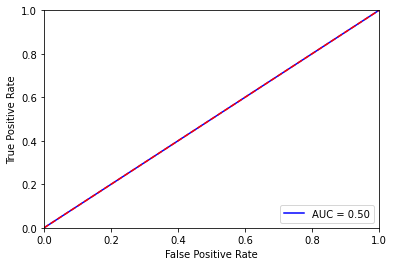

In [40]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [41]:
pred = []
for elem in y_pred2:
  pred.append(int(round(elem)))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     42484
           1       0.00      0.00      0.00      2223

    accuracy                           0.95     44707
   macro avg       0.48      0.50      0.49     44707
weighted avg       0.90      0.95      0.93     44707

[[42484     0]
 [ 2223     0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


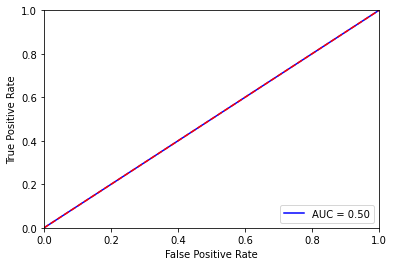

In [42]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
y_columns = "identity_hate"
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
x_train = x_train.reshape(-1,1)
LIN = LinearRegression()
LIN.fit(x_train, y_train)
x_test = x_test.reshape(-1,1)
y_pred = LIN.predict(x_train)
y_pred2 = LIN.predict(x_test)
print("Train MAE: ")
print(metrics.mean_absolute_error(y_train,y_pred))
print()
print("Test MAE: ")
print(metrics.mean_absolute_error(y_test,y_pred2))
print()
print("Test MSE: ")
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

Train MAE: 
0.018928416442130766

Test MAE: 
0.018422149594094432

Test MSE: 
0.09465979980338887


In [44]:
pred = []
for elem in y_pred:
  pred.append(int(round(elem)))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    177115
           1       0.00      0.00      0.00      1712

    accuracy                           0.99    178827
   macro avg       0.50      0.50      0.50    178827
weighted avg       0.98      0.99      0.99    178827

[[177115      0]
 [  1712      0]]


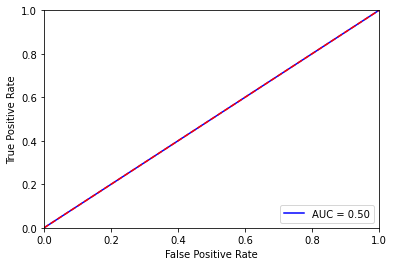

In [45]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [46]:
pred = []
for elem in y_pred2:
  pred.append(int(round(elem)))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     44302
           1       0.00      0.00      0.00       405

    accuracy                           0.99     44707
   macro avg       0.50      0.50      0.50     44707
weighted avg       0.98      0.99      0.99     44707

[[44302     0]
 [  405     0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


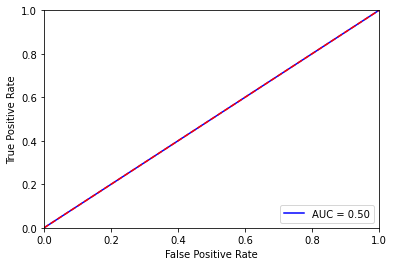

In [47]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,Daww He matches this background colour Im seem...,0,0,0,0,0,0
2,000113f07ec002fd,Hey man Im really not trying to edit war Its j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,More I cant make any real suggestions on impr...,0,0,0,0,0,0
4,0001d958c54c6e35,You sir are my hero Any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
223544,fff8f64043129fa2,Jerome I see you never got around to this… I’m...,0,0,0,0,0,0
223545,fff9d70fe0722906,Lucky bastard Heh you are famous now I kida en...,0,0,0,0,0,0
223546,fffa8a11c4378854,shame on you all You want to speak about gays ...,0,0,0,0,0,0
223547,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0


In [ ]:
train['comment_text'] = cz
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,101456,0,0,0,0,0,0
1,000103f0d9cfb60f,96303,0,0,0,0,0,0
2,000113f07ec002fd,110961,0,0,0,0,0,0
3,0001b41b1c6bb37e,36656,0,0,0,0,0,0
4,0001d958c54c6e35,202984,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
223544,fff8f64043129fa2,136111,0,0,0,0,0,0
223545,fff9d70fe0722906,140114,0,0,0,0,0,0
223546,fffa8a11c4378854,216907,0,0,0,0,0,0
223547,fffac2a094c8e0e2,140258,1,0,1,0,1,0
